# 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Define Function

In [3]:
def LR_find_r(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    fraction = ((X - Xmean)*(Y - Ymean)).sum()
    denominator = np.sqrt(((X - Xmean)**2).sum()*((Y - Ymean)**2).sum())
    r = fraction/denominator
    return r

In [5]:
def LR_find_ab(X, Y):
    XY = X*Y
    X2 = X**2
    Xmean = X.mean()
    Ymean = Y.mean()
    XYmean = XY.mean()
    X2mean = X2.mean()
    denominator = X2mean - Xmean**2
    a = (XYmean - Xmean*Ymean)/denominator
    b = (X2mean*Ymean - Xmean*XYmean)/denominator
    return a, b

In [4]:
def LR_find_Yhat(X, a, b):
    Yhat = a*X + b
    return Yhat

In [6]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [7]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [8]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [9]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [10]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

# 3. Read data

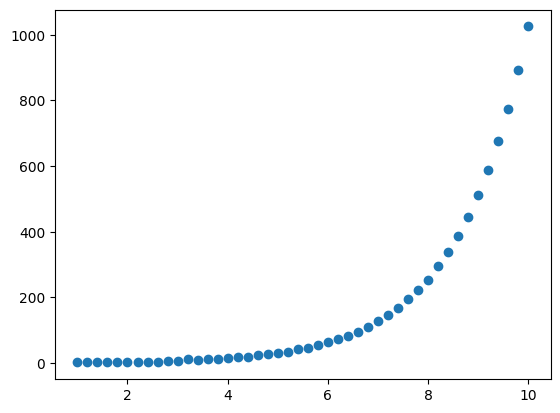

In [49]:
Data = pd.read_csv("GB.csv")

DataMatrix = Data.values
N = DataMatrix.shape[0]  #N = 46
X = DataMatrix[:, :1]
Y = DataMatrix[:, 1:]
plt.scatter(X, Y)
plt.show()

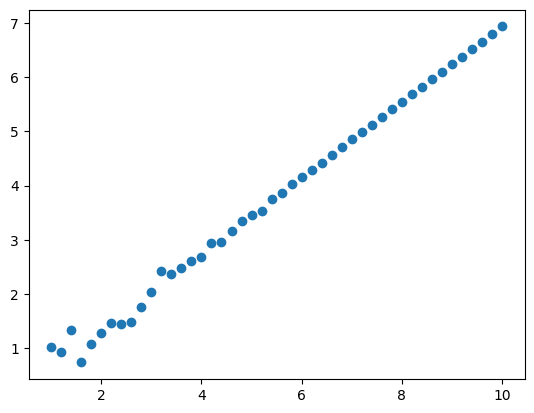

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

# 4. Create Model

In [51]:
X_Train = X[:35]
Y_Train = Y[:35]

X_Test = X[35:]
Y_Test = Y[35:]

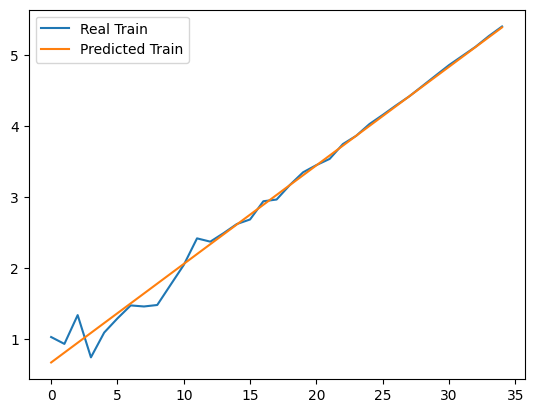

In [52]:
a, b = LR_find_ab(X_Train, Y_Train)

Yhat_Train = LR_find_Yhat(X_Train, a, b)
error_Train = find_error(Y_Train, Yhat_Train, 'MAPE')

plt.plot(Y_Train, label = 'Real Train')
plt.plot(Yhat_Train, label = 'Predicted Train')
plt.legend()

In [53]:
error_Train

6.027487276119556

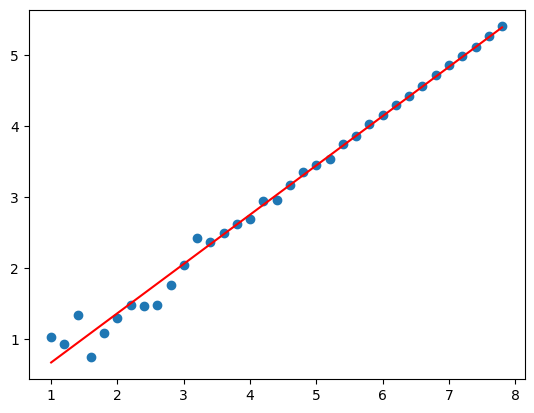

In [54]:
plt.scatter(X_Train, Y_Train)
plt.plot(X_Train, Yhat_Train, 'r')

# 5. Make Prediction

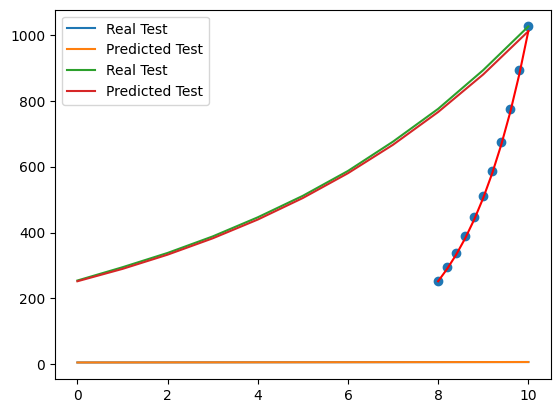

In [55]:
Yhat_Test = LR_find_Yhat(X_Test, a, b)
error_Test = find_error(Y_Test, Yhat_Test, 'SSE')
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.legend()

error_Test
Y_Test = np.exp(Y_Test)
Yhat_Test = np.exp(Yhat_Test)

plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.legend()

plt.scatter(X_Test, Y_Test)
plt.plot(X_Test, Yhat_Test, 'r')